In [29]:
from wok.parse import DictionaryParser, IDSParser
from pathlib import Path
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import os

__file__ = Path(os.path.abspath('__file__'))
data_path = __file__.parent/'wok'/'data'
print(data_path)

idsp = IDSParser(data_path=data_path)

#####
chars = {}

temp_ids_chars = ""
for i, (k, v) in enumerate(idsp.ids_score_dict.items(), start=1):
    chars[k] = i
    temp_ids_chars += v['ids'][0]
temp_ids_chars = list(temp_ids_chars)

ids_chars_count = dict(sorted(dict(Counter(temp_ids_chars)).items(), key=lambda x: x[1], reverse=True))

#####
ids_chars = list(ids_chars_count.keys())

/home/shaneoh/workspace/radical-clustering/wok/data
ids_dictionary created
ids_score_dictionary created


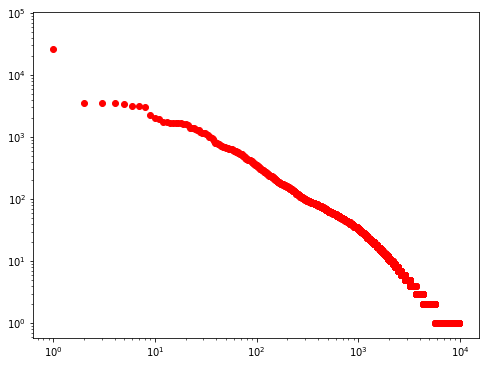

In [30]:
# x'th ids component count = y (x sorted)
indexes = np.arange(len(ids_chars_count))

plt.figure(figsize=(8,6))
plt.plot(indexes, ids_chars_count.values(), 'ro')
plt.xscale('log')
plt.yscale('log')
plt.show()

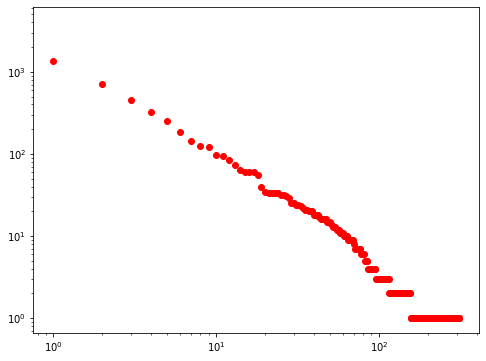

In [31]:
# 10^3 chars where used 10^0(once)
counts = dict(sorted(Counter(ids_chars_count.values()).items(), key=lambda x: x[1], reverse=True))
indexes = np.arange(len(counts))

plt.figure(figsize=(8,6))
plt.plot(indexes, counts.values(), 'ro')
plt.xscale('log')
plt.yscale('log')
plt.show()

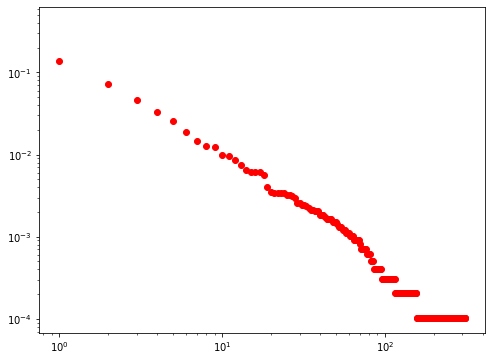

In [32]:
# 10^-1 * 100% of chars where used 10^0(once)
counts = dict(sorted(Counter(ids_chars_count.values()).items(), key=lambda x: x[1], reverse=True))
indexes = np.arange(len(counts))

s = sum(counts.values())

plt.figure(figsize=(8,6))
plt.plot(indexes, list(map(lambda x: x/s, counts.values())), 'ro')
plt.xscale('log')
plt.yscale('log')
plt.show()

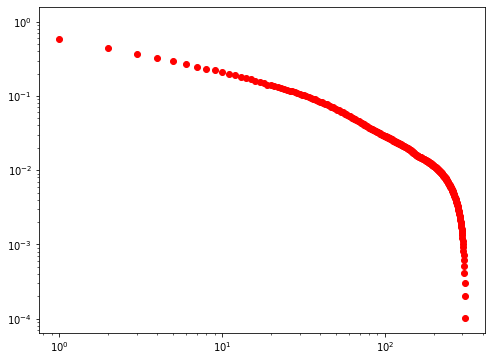

In [33]:
# CCDF

stacked_count = []
for i in range(len(counts.values())):
    stacked_count.append(sum(list(counts.values())[i:]))

s = sum(counts.values())
stacked_count = list(map(lambda x: x/s, stacked_count))

indexes = np.arange(len(counts))

plt.figure(figsize=(8,6))
plt.plot(indexes, stacked_count, 'ro')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [34]:
print('chars', len(chars))
print('ids_chars', len(ids_chars))

chars 88937
ids_chars 9821


In [35]:
max_score = -1
for k, v in idsp.ids_score_dict.items():
    for i in v['score']:
        if i > max_score:
            max_score = i
print(max_score)

832.0


In [36]:
tokens_dict = {}
tokens = "⿰⿱⿲⿳⿴⿵⿶⿷⿸⿹⿺⿻"
for t in tokens:
    tokens_dict[t] = {'ids': [t], 'score': [max_score]}

d = tokens_dict
d.update(idsp.ids_score_dict)

register = dict(zip(d.keys(), range(1, len(d.keys())+1)))

In [37]:
with open('ids_hex.net', 'w') as f:
    f.write(f"*Vertices\t{len(d)}\n")
    for c, i in register.items():
        f.write(f"{i}\t\"{hex(ord(c))}\"\n")
    f.write(f"*Edges\n")
    for k, v in idsp.ids_score_dict.items():
        for ids, score in zip(v['ids'], v['score']):
            if k == ids:
                continue
            else:
                for ids_c in ids:
                    f.write(f"{register[k]}\t{register[ids_c]}\t{score/len(ids)}\n")

In [38]:
with open('louvain_communities.clu', 'r') as f:
    f = list(f.readlines())[1:]
    f = list(map(lambda x: x.strip(), f))

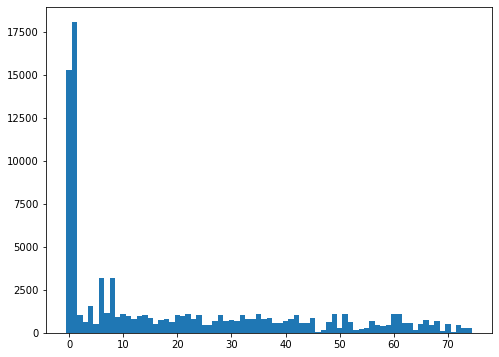

In [39]:
# cluster size (1~75)
d = dict(Counter(f))
indexes = np.arange(len(d))

plt.figure(figsize=(8,6))
plt.bar(indexes, d.values(), width=1)
plt.show()

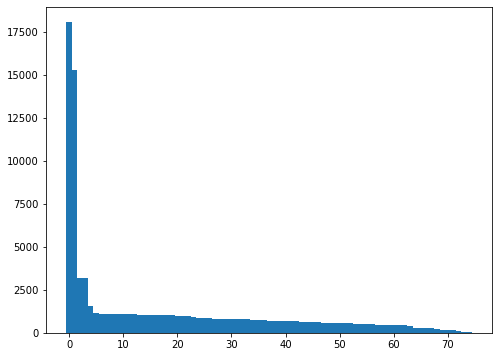

In [40]:
d = dict(sorted(dict(Counter(f)).items(), key=lambda x: x[1], reverse=True))
indexes = np.arange(len(d))

plt.figure(figsize=(8,6))
plt.bar(indexes, d.values(), width=1)
plt.show()

In [43]:
print("Number of clusters")
print(len(d))
print()

print("Average size of clusters")
print(sum(d.values()) / len(d))
print()

print("Average size of clusters (80%) (10-80-10)")
print(sum(list(d.values())[round(len(d)*0.1):-round(len(d)*0.1)]) / len(d))
print()

print("Max/min size of clusters")
print(list(d.values())[0], list(d.values())[-1])

Number of clusters
75

Average size of clusters
1184.6666666666667

Average size of clusters (80%) (10-80-10)
573.2

Max/min size of clusters
18064 58


In [53]:
cluster_dict = {}
for ids_c, cluster_id in zip(register, f):
    if cluster_id in cluster_dict:
        cluster_dict[cluster_id].append(ids_c)
    else:
        cluster_dict[cluster_id] = [ids_c]

for k, v in cluster_dict.items():
    print(len(v))

15278
18064
1032
608
1563
496
3194
1138
3172
944
1118
987
779
1002
1033
873
486
761
811
631
1013
976
1097
803
1007
435
430
695
1043
714
721
695
1015
811
827
1073
801
846
585
585
688
790
1050
596
558
873
61
142
600
1114
297
1103
606
155
230
265
688
471
367
464
1092
1115
597
543
180
499
729
438
698
127
514
58
439
275
286
